In [1]:
## To predict the prices of Singapore's resale flats
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

In [3]:
# to import the dataset
df = pd.read_csv('C:/Users/miche/Desktop/machine_learning/Resale_flat_prices_sg.csv')

In [4]:
df.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2017-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61 years 04 months,232000.0
1,2017-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,60 years 07 months,250000.0
2,2017-01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,262000.0
3,2017-01,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1980,62 years 01 month,265000.0
4,2017-01,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,265000.0


In [5]:
# to check for missing values
df.isnull().sum()

month                  0
town                   0
flat_type              0
block                  0
street_name            0
storey_range           0
floor_area_sqm         0
flat_model             0
lease_commence_date    0
remaining_lease        0
resale_price           0
dtype: int64

In [6]:
# to check for duplicates values in data
duplicates = df[df.duplicated()]

In [7]:
# there are 278 duplicated row in dataframe
duplicates

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
243,2017-01,BUKIT MERAH,4 ROOM,106,HENDERSON CRES,07 TO 09,81.0,Improved,1975,57 years,470000.0
305,2017-01,CENTRAL AREA,3 ROOM,271,QUEEN ST,16 TO 18,68.0,Improved,1979,61 years 02 months,470000.0
510,2017-01,JURONG EAST,4 ROOM,265,TOH GUAN RD,04 TO 06,101.0,Model A,1998,80 years 09 months,470000.0
591,2017-01,JURONG WEST,4 ROOM,337A,TAH CHING RD,19 TO 21,92.0,Model A,2010,92 years 03 months,470000.0
672,2017-01,PASIR RIS,4 ROOM,753,PASIR RIS ST 71,01 TO 03,105.0,Model A,1996,78 years 10 months,368000.0
...,...,...,...,...,...,...,...,...,...,...,...
154401,2023-09,KALLANG/WHAMPOA,3 ROOM,93,GEYLANG BAHRU,04 TO 06,68.0,New Generation,1979,54 years 05 months,420000.0
156908,2023-03,PUNGGOL,4 ROOM,232A,SUMANG LANE,16 TO 18,93.0,Model A,2018,94 years 08 months,580000.0
158603,2023-08,SEMBAWANG,4 ROOM,104D,CANBERRA ST,13 TO 15,93.0,Model A,2018,94 years,600000.0
163813,2023-04,WOODLANDS,4 ROOM,28,MARSILING DR,07 TO 09,97.0,New Generation,1977,53 years,395000.0


In [8]:
# to remove duplicates rows in dataset
df = df.drop_duplicates(keep='first', inplace=False)

In [9]:
# to see if variables are in their correct data types
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 166801 entries, 0 to 167078
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                166801 non-null  object 
 1   town                 166801 non-null  object 
 2   flat_type            166801 non-null  object 
 3   block                166801 non-null  object 
 4   street_name          166801 non-null  object 
 5   storey_range         166801 non-null  object 
 6   floor_area_sqm       166801 non-null  float64
 7   flat_model           166801 non-null  object 
 8   lease_commence_date  166801 non-null  int64  
 9   remaining_lease      166801 non-null  object 
 10  resale_price         166801 non-null  float64
dtypes: float64(2), int64(1), object(8)
memory usage: 15.3+ MB


In [10]:
# to do some feature engineering work before Exploratory data analysis
# to convert 'month' column to datetime
df['month'] = pd.to_datetime(df['month'])

In [11]:
df['year'] = df['month'].dt.year

In [12]:
df['Month'] = df['month'].dt.month

In [13]:
# to remove the 'month' column as not useful
df = df.drop('month', axis=1)

In [14]:
df['remaining_lease'].value_counts()

remaining_lease
94 years 09 months    1514
94 years 10 months    1507
94 years 11 months    1480
94 years 08 months    1378
94 years 07 months    1335
                      ... 
93 years 0 months        1
97 years 09 months       1
97 years 07 months       1
97 years 03 months       1
97 years 01 month        1
Name: count, Length: 669, dtype: int64

In [15]:
# to convert Years and months in 'remaining_lease' column into a 'float' variable
df['Remaining_lease_float'] = (pd.to_numeric(df['remaining_lease'].str.extractall('(\d+)')[0])
                 .unstack().div([1, 12]).sum(axis=1)
                 .round(2))

In [16]:
# to remove the'remaining_lease' as no longer useful
df = df.drop('remaining_lease',axis=1)

In [17]:
# to review changes
df.head()

,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,year,Month,Remaining_lease_float
0,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,232000.0,2017,1,61.33
1,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,250000.0,2017,1,60.58
2,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,262000.0,2017,1,62.42
3,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1980,265000.0,2017,1,62.08
4,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,265000.0,2017,1,62.42


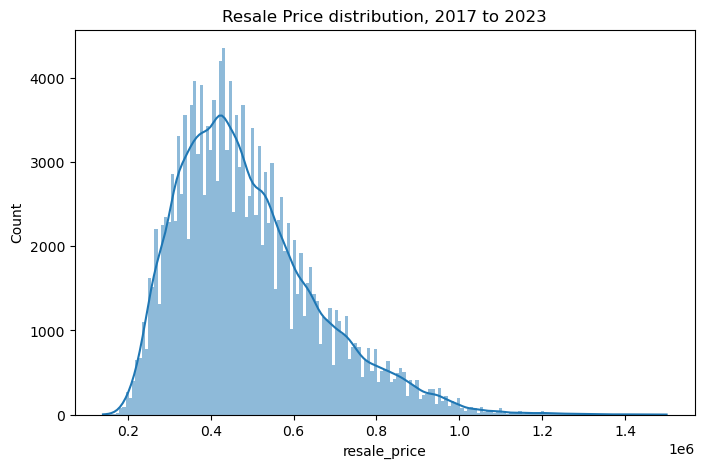

In [19]:
# to plot a distribution plot of continuous variable: 'resale_price' HDB prices
plt.figure(figsize=(8,5), dpi=100)
sns.histplot(data=df, x='resale_price', edgecolor=None, kde=True)
plt.title('Resale Price distribution, 2017 to 2023');

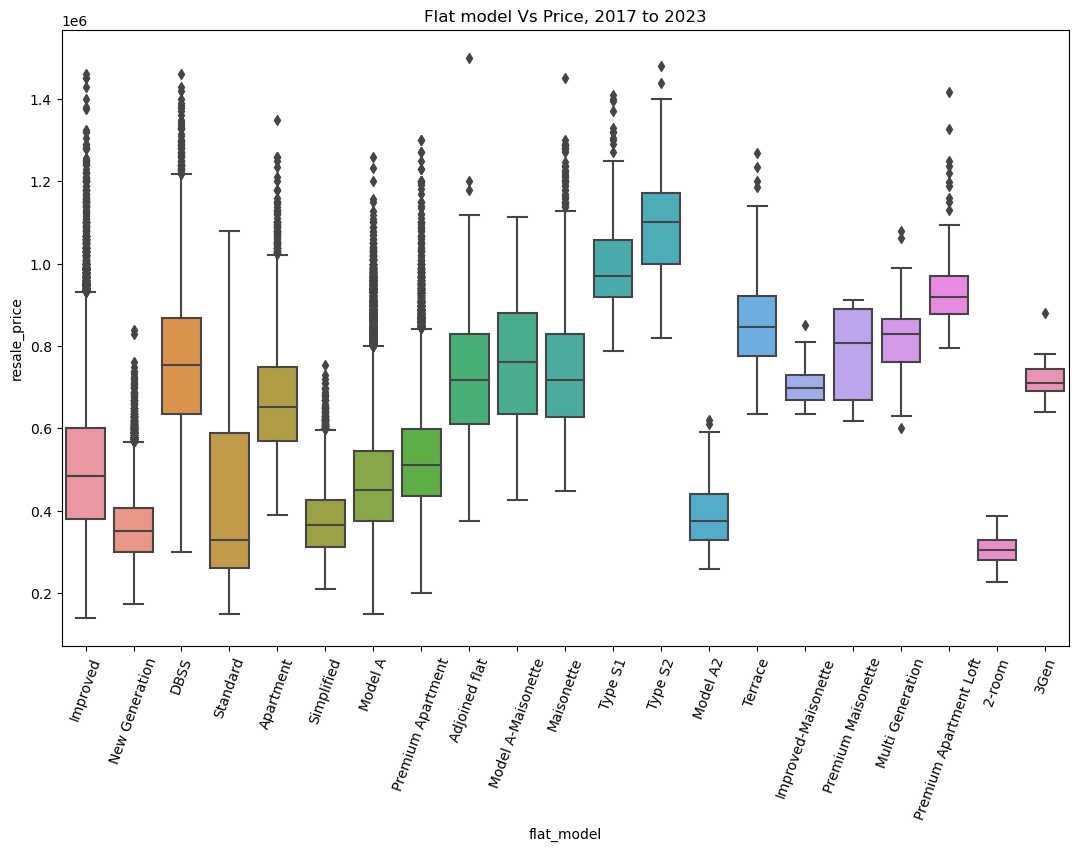

In [20]:
# to compare flat model against resale price
# it is observed that Type S1, S2 are the most expensive flat, 2room flats are the cheapest
plt.figure(figsize=(13,8), dpi=100)
sns.boxplot(data=df, x='flat_model', y='resale_price')
plt.xticks(rotation=70)
plt.title('Flat model Vs Price, 2017 to 2023');

In [22]:
# to print the average price according to the model of the flat
pd.DataFrame(df.groupby('flat_model')['resale_price'].median().sort_values(ascending=False))

,resale_price
flat_model,
Type S2,1100000.0
Type S1,970000.0
Premium Apartment Loft,920000.0
Terrace,845000.0
Multi Generation,828000.0
Premium Maisonette,808000.0
Model A-Maisonette,762000.0
DBSS,755000.0
Adjoined flat,718000.0


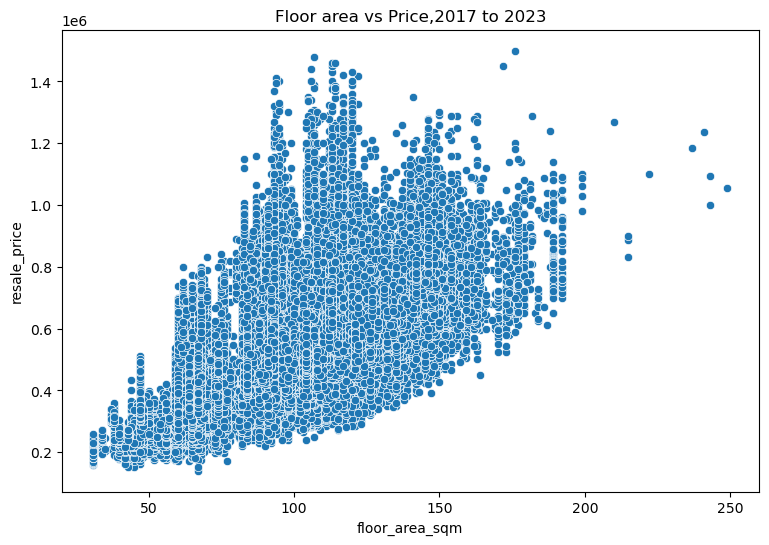

In [23]:
plt.figure(figsize=(9,6),dpi=100)
sns.scatterplot(data=df, x='floor_area_sqm',y='resale_price')
plt.title('Floor area vs Price,2017 to 2023');

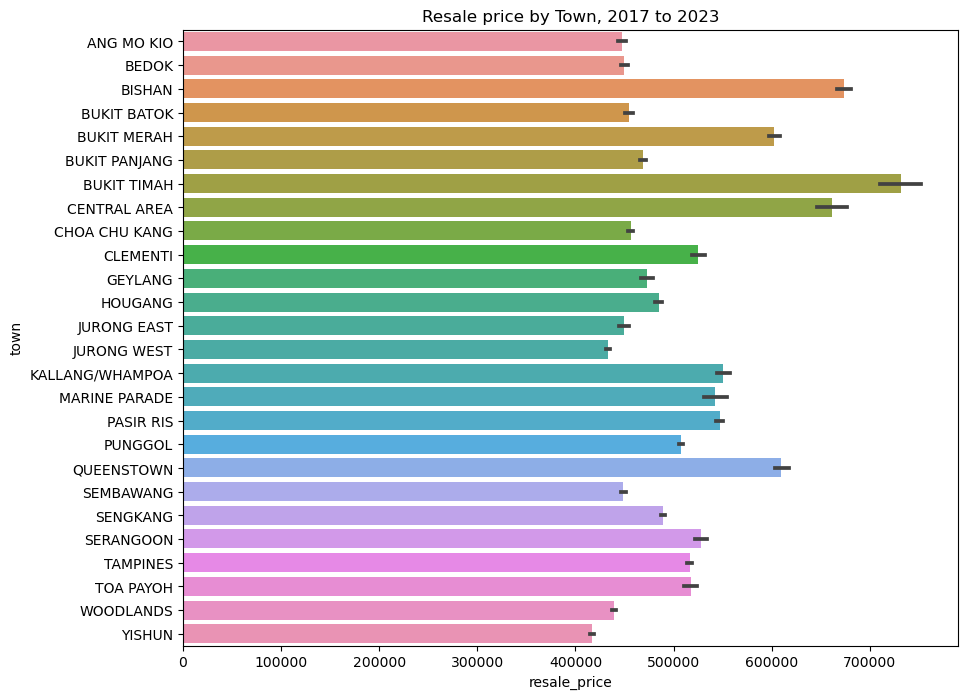

In [24]:
# seems like the flats around Bukit Timah fetch the highest price
plt.figure(figsize=(10,8),dpi=100)
sns.barplot(data=df, y='town', x='resale_price')
plt.title('Resale price by Town, 2017 to 2023');

In [26]:
# to print the average resale price by Town
# HDB flats in Bukit Timah is the most expensive followed by Bishan
pd.DataFrame(df.groupby('town')['resale_price'].median().sort_values(ascending=False))

,resale_price
town,
BUKIT TIMAH,725000.0
BISHAN,655000.0
QUEENSTOWN,645000.0
BUKIT MERAH,620000.0
CENTRAL AREA,538000.0
PASIR RIS,530000.0
KALLANG/WHAMPOA,530000.0
TAMPINES,500000.0
PUNGGOL,495000.0


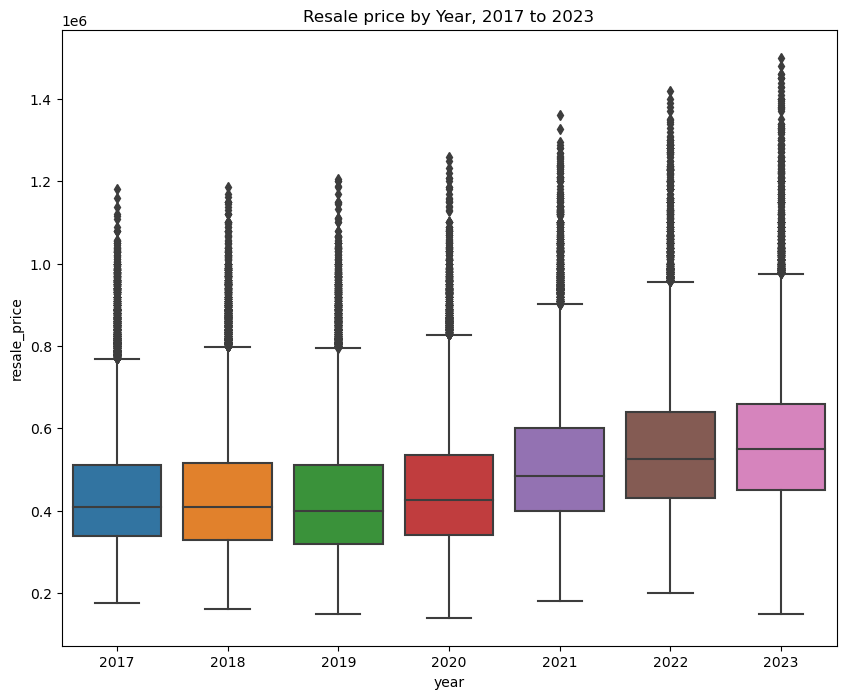

In [27]:
plt.figure(figsize=(10,8), dpi=100)
sns.boxplot(data=df, x='year', y='resale_price')
plt.title('Resale price by Year, 2017 to 2023');

In [29]:
# From 2021 onward, there is a sharp increase in housing prices
# to print the median resale price by year
pd.DataFrame(df.groupby('year')['resale_price'].median())

,resale_price
year,
2017,410000.0
2018,408000.0
2019,400000.0
2020,425000.0
2021,483000.0
2022,525000.0
2023,550000.0


In [30]:
df2 = df[df['year']==2023]

In [31]:
df2.head()

,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,year,Month,Remaining_lease_float
143395,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,01 TO 03,44.0,Improved,1979,267000.0,2023,1,55.42
143396,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,04 TO 06,44.0,Improved,1979,290000.0,2023,7,54.92
143397,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,04 TO 06,44.0,Improved,1979,275000.0,2023,8,54.83
143398,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,04 TO 06,44.0,Improved,1979,305000.0,2023,11,54.58
143399,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,07 TO 09,44.0,Improved,1979,295000.0,2023,11,54.58


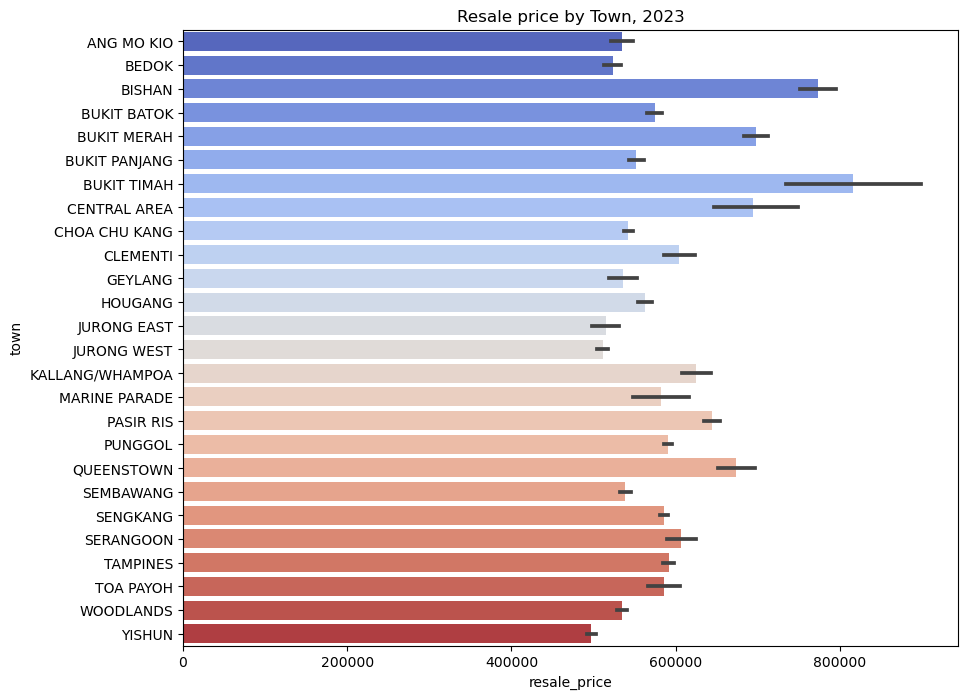

In [32]:
# In 2023, HDB flats around Bukit Timah & Bishan fetch the highest price
plt.figure(figsize=(10,8),dpi=100)
sns.barplot(data=df2, y='town', x='resale_price', palette='coolwarm')
plt.title('Resale price by Town, 2023');

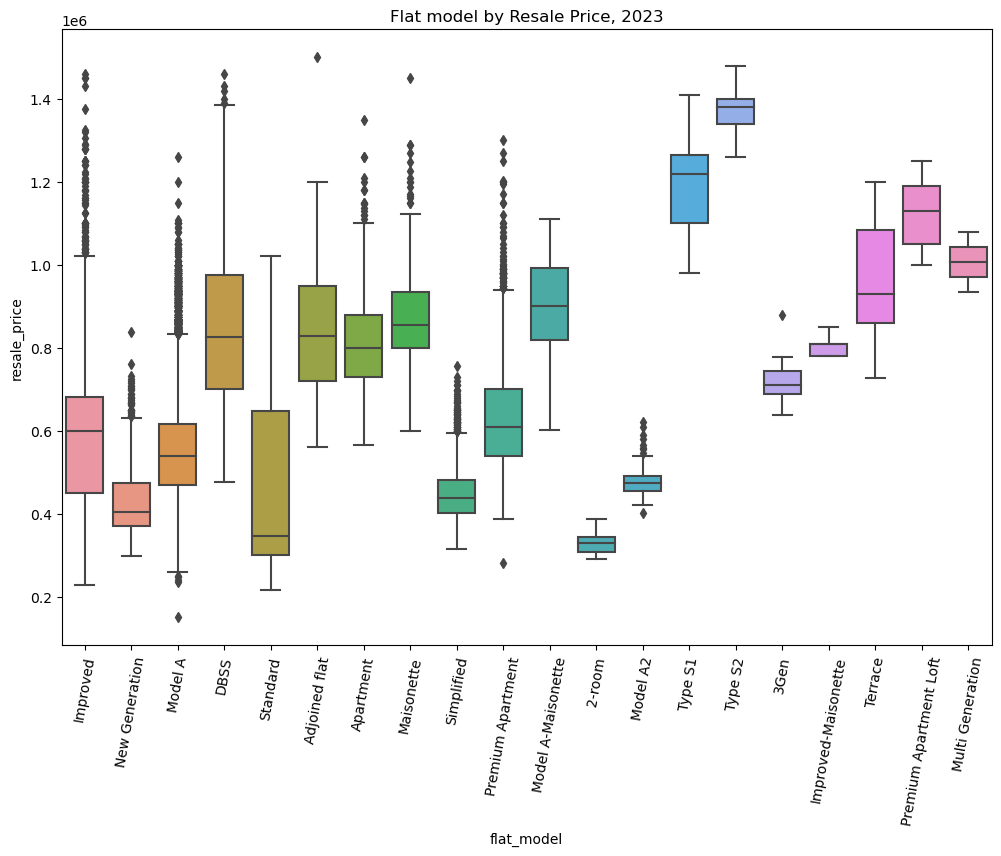

In [33]:
# In 2023, Type S2 = most expensive, 2room flat = cheapest
plt.figure(figsize=(12,8),dpi=100)
sns.boxplot(data=df2, x='flat_model', y='resale_price')
plt.title('Flat model by Resale Price, 2023')
plt.xticks(rotation=80);

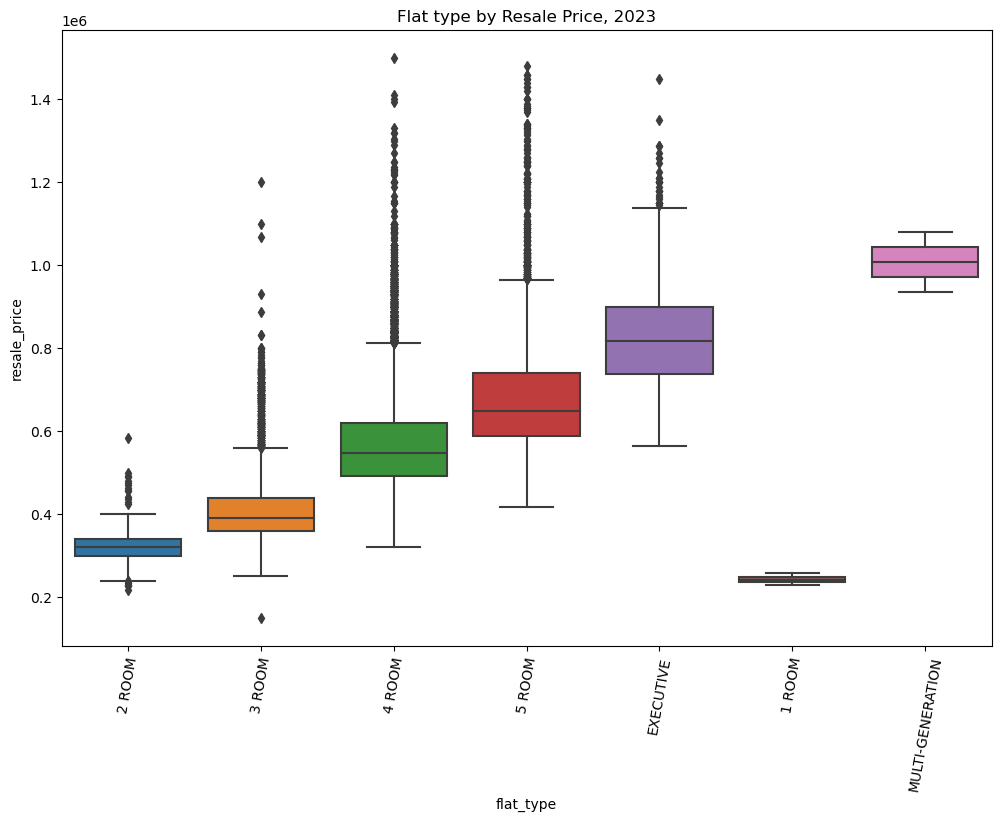

In [34]:
# In 2023, multi generation flat are priced higher, 1 room flat the cheapest
plt.figure(figsize=(12,8),dpi=100)
sns.boxplot(data=df2, x='flat_type', y='resale_price')
plt.title('Flat type by Resale Price, 2023')
plt.xticks(rotation=80);

In [35]:
# to check variables are in their correct variable type
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23673 entries, 143395 to 167078
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   town                   23673 non-null  object 
 1   flat_type              23673 non-null  object 
 2   block                  23673 non-null  object 
 3   street_name            23673 non-null  object 
 4   storey_range           23673 non-null  object 
 5   floor_area_sqm         23673 non-null  float64
 6   flat_model             23673 non-null  object 
 7   lease_commence_date    23673 non-null  int64  
 8   resale_price           23673 non-null  float64
 9   year                   23673 non-null  int32  
 10  Month                  23673 non-null  int32  
 11  Remaining_lease_float  23673 non-null  float64
dtypes: float64(3), int32(2), int64(1), object(6)
memory usage: 2.2+ MB


In [32]:
# to see correlation of df2 (2023 dataset) against current 2023 'resale_price'
# 'floor_area_sqm' highest correlation to resale price
df2.select_dtypes(['int','float']).corr()['resale_price']

floor_area_sqm           0.683096
lease_commence_date      0.366456
resale_price             1.000000
year                          NaN
Month                    0.038951
Remaining_lease_float    0.365833
Name: resale_price, dtype: float64

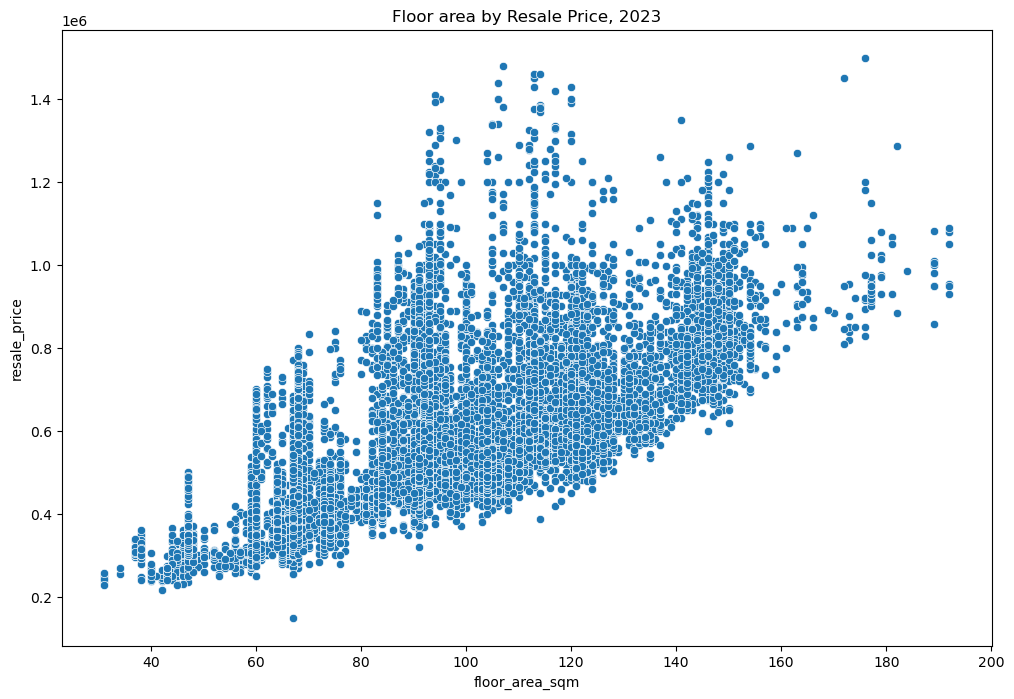

In [33]:
plt.figure(figsize=(12,8),dpi=100)
sns.scatterplot(data=df2, x='floor_area_sqm', y='resale_price')
plt.title('Floor area by Resale Price, 2023');

In [34]:
# to map flat type toto number of rooms(bedroom + bathrooms) to get ready for ANN regression, must be all numerics
# Executive = 5, MULTI-GENERATION = 7
df['flat_type'] = df['flat_type'].map({'1 ROOM':1, '2 ROOM':2, '3 ROOM':3, '4 ROOM':4, '5 ROOM':5, 'EXECUTIVE':5, 'MULTI-GENERATION':7})

In [35]:
# to map 'flat_model' to numerics according to their average price
# with 1 = least expensive,    21= most expensive
df['flat_model'] = df['flat_model'].map({'2-room':1,'New Generation':2,'Simplified':3,'Model A2':4,'Standard':5,'Model A':6,
                                        'Improved':7,'Premium Apartment':8,'Apartment':9,'Improved-Maisonette':10, '3Gen':11,
                                        'Adjoined flat':12,'Maisonette':13,'Model A-Maisonette':14,'DBSS':15,'Premium Maisonette':16,
                                        'Multi Generation':17,'Terrace':18,'Premium Apartment Loft':19,'Type S1':20,'Type S2':21})

In [36]:
# to remove unimportant variables for ANN regression prediction of housing prices
df = df.drop(['town','street_name','storey_range','block','year','Month'], axis=1)

In [37]:
# check variables, all must be in numeric
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 166801 entries, 0 to 167078
Data columns (total 6 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   flat_type              166801 non-null  int64  
 1   floor_area_sqm         166801 non-null  float64
 2   flat_model             166801 non-null  int64  
 3   lease_commence_date    166801 non-null  int64  
 4   resale_price           166801 non-null  float64
 5   Remaining_lease_float  166801 non-null  float64
dtypes: float64(3), int64(3)
memory usage: 8.9 MB


In [38]:
# to define X and y, add .values for tensorflow algorithm, to create ANN regression model from 2017 to 2023 dataset
X = df.drop('resale_price', axis=1).values

In [39]:
y = df['resale_price'].values

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
from sklearn.preprocessing import StandardScaler

In [42]:
# testing set = 30%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [43]:
scaler = StandardScaler()

In [44]:
X_train = scaler.fit_transform(X_train)

In [45]:
X_test = scaler.transform(X_test)

In [46]:
from tensorflow.keras.models import Sequential

In [47]:
from tensorflow.keras.layers import Dense

In [48]:
X_train.shape

(116760, 5)

In [49]:
# to create the training ANN model
model = Sequential()

model.add(Dense(5,activation='relu'))  # 5 neurons 4 layers of 5 neurons
model.add(Dense(5,activation='relu'))  # 5 neurons
model.add(Dense(5,activation='relu'))  # 5 neurons
model.add(Dense(5,activation='relu'))  # 5 neurons

model.add(Dense(1)) # output layer; to predict the price of the house

model.compile(optimizer='adam', loss='mse') ## Regression problem as 'price' is a continuous variable, MSE = mean squared error

In [50]:
# to train the ANN regression model
model.fit(x=X_train, y=y_train, validation_data=(X_test, y_test),
                                 batch_size=256, epochs=400) # epochs = 400

Epoch 1/400
457/457 [==============================] - 2s 3ms/step - loss: 269158678528.0000 - val_loss: 266798219264.0000
Epoch 2/400
457/457 [==============================] - 1s 3ms/step - loss: 257721352192.0000 - val_loss: 231356628992.0000
Epoch 3/400
457/457 [==============================] - 1s 2ms/step - loss: 169252683776.0000 - val_loss: 95571730432.0000
Epoch 4/400
457/457 [==============================] - 1s 3ms/step - loss: 53480566784.0000 - val_loss: 31643222016.0000
Epoch 5/400
457/457 [==============================] - 2s 3ms/step - loss: 25672265728.0000 - val_loss: 22280683520.0000
Epoch 6/400
457/457 [==============================] - 2s 4ms/step - loss: 20517138432.0000 - val_loss: 19407296512.0000
Epoch 7/400
457/457 [==============================] - 2s 4ms/step - loss: 18469535744.0000 - val_loss: 17872353280.0000
Epoch 8/400
457/457 [==============================] - 2s 4ms/step - loss: 17250766848.0000 - val_loss: 16843085824.0000
Epoch 9/400
457/457 [======

Epoch 135/400
457/457 [==============================] - 2s 4ms/step - loss: 10963107840.0000 - val_loss: 10986085376.0000
Epoch 136/400
457/457 [==============================] - 2s 4ms/step - loss: 10964584448.0000 - val_loss: 10981191680.0000
Epoch 137/400
457/457 [==============================] - 2s 4ms/step - loss: 10963353600.0000 - val_loss: 10985228288.0000
Epoch 138/400
457/457 [==============================] - 2s 4ms/step - loss: 10963159040.0000 - val_loss: 10980691968.0000
Epoch 139/400
457/457 [==============================] - 2s 4ms/step - loss: 10961446912.0000 - val_loss: 10986273792.0000
Epoch 140/400
457/457 [==============================] - 2s 4ms/step - loss: 10960864256.0000 - val_loss: 10979055616.0000
Epoch 141/400
457/457 [==============================] - 2s 4ms/step - loss: 10959463424.0000 - val_loss: 10979756032.0000
Epoch 142/400
457/457 [==============================] - 2s 4ms/step - loss: 10959696896.0000 - val_loss: 10979425280.0000
Epoch 143/400
45

457/457 [==============================] - 2s 4ms/step - loss: 10894501888.0000 - val_loss: 10922532864.0000
Epoch 268/400
457/457 [==============================] - 2s 4ms/step - loss: 10893840384.0000 - val_loss: 10924539904.0000
Epoch 269/400
457/457 [==============================] - 2s 4ms/step - loss: 10893563904.0000 - val_loss: 10922539008.0000
Epoch 270/400
457/457 [==============================] - 2s 4ms/step - loss: 10892566528.0000 - val_loss: 10921400320.0000
Epoch 271/400
457/457 [==============================] - 2s 4ms/step - loss: 10891708416.0000 - val_loss: 10920425472.0000
Epoch 272/400
457/457 [==============================] - 2s 4ms/step - loss: 10892360704.0000 - val_loss: 10927567872.0000
Epoch 273/400
457/457 [==============================] - 2s 5ms/step - loss: 10893949952.0000 - val_loss: 10921376768.0000
Epoch 274/400
457/457 [==============================] - 2s 4ms/step - loss: 10893148160.0000 - val_loss: 10919927808.0000
Epoch 275/400
457/457 [=======

457/457 [==============================] - 2s 4ms/step - loss: 10874292224.0000 - val_loss: 10901997568.0000
Epoch 400/400
457/457 [==============================] - 2s 4ms/step - loss: 10873829376.0000 - val_loss: 10902801408.0000


In [51]:
pd.DataFrame(model.history.history)

,loss,val_loss
0,2.691587e+11,2.667982e+11
1,2.577214e+11,2.313566e+11
2,1.692527e+11,9.557173e+10
3,5.348057e+10,3.164322e+10
4,2.567227e+10,2.228068e+10
...,...,...
395,1.087252e+10,1.090428e+10
396,1.087301e+10,1.090307e+10
397,1.087349e+10,1.090140e+10
398,1.087429e+10,1.090200e+10


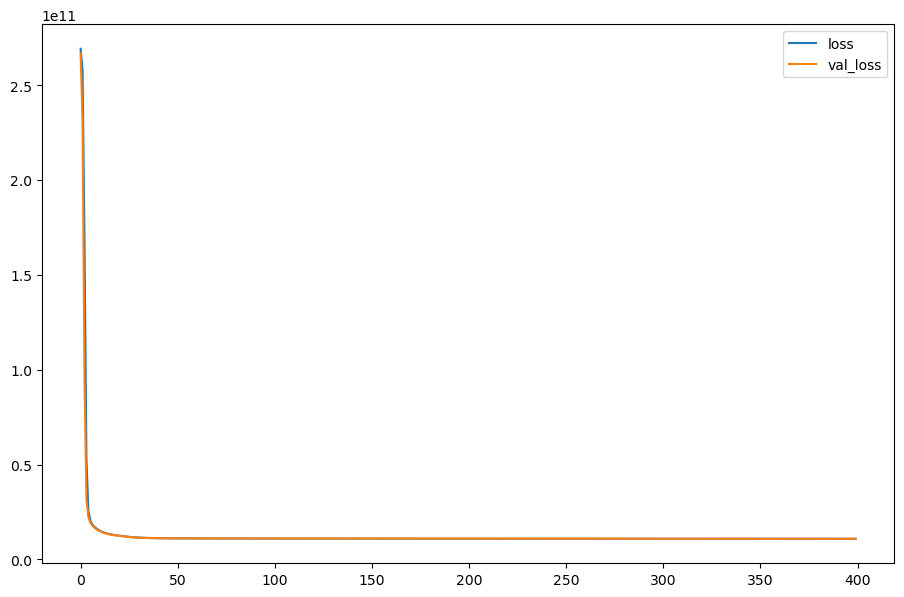

In [52]:
# to visualise both training and validation loss(test set)
losses = pd.DataFrame(model.history.history)
losses.plot(figsize=(11,7));

In [53]:
# to import performance evaluation metrics measure
from sklearn.metrics import mean_absolute_error, mean_squared_error,explained_variance_score

In [54]:
# to do prediction on the X test set
predictions = model.predict(X_test)

1564/1564 [==============================] - 4s 2ms/step


In [55]:
# to interpret the score of explained variance, best scores = 1.0
# explained variance score ANN regression = 0.64
explained_variance_score(y_test, predictions)

0.6201634662554067

In [56]:
mean_absolute_error(y_test,predictions)

75246.33551469045

In [57]:
mean_squared_error(y_test,predictions)

10902801653.214092

In [58]:
print('Root Mean square error:',np.sqrt(mean_squared_error(y_test,predictions)))

Root Mean square error: 104416.48171248681


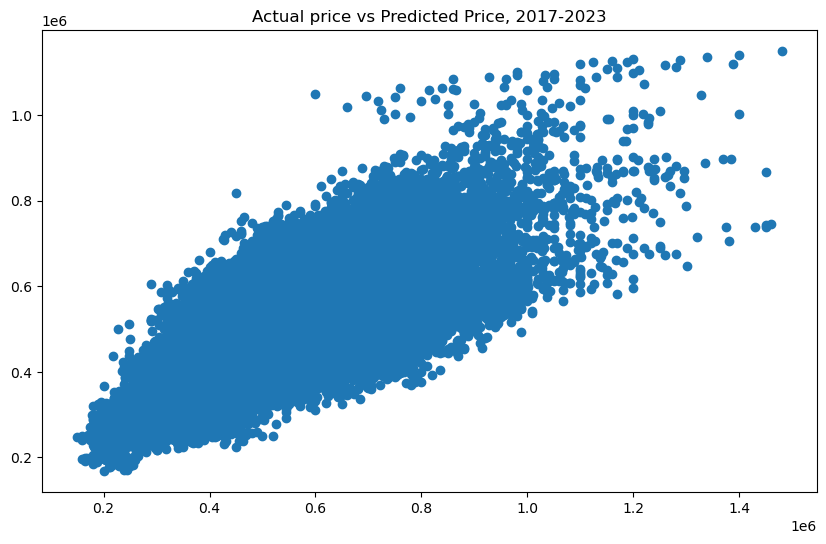

In [59]:
# to visualise the predictions on a scatterplot
plt.figure(figsize=(10,6),dpi=100)
plt.scatter(y_test,predictions)
plt.title('Actual price vs Predicted Price, 2017-2023');

In [60]:
df.tail()

,flat_type,floor_area_sqm,flat_model,lease_commence_date,resale_price,Remaining_lease_float
167074,5,154.0,13,1987,829000.0,63.50
167075,5,146.0,13,1987,855000.0,63.50
167076,5,146.0,13,1988,860000.0,63.58
167077,7,179.0,17,1987,1080000.0,63.92
167078,7,159.0,17,1987,935000.0,63.50


In [61]:
# to use the ANN regression prediction model to predict on a brand new house, as dataset is huge from 2017 onwards, 
# better to predict price from year 2023 onwards
# iloc[0] to return the feature of the HDB flat located at position 167074
df.drop('resale_price', axis=1).loc[167074]

flat_type                   5.0
floor_area_sqm            154.0
flat_model                 13.0
lease_commence_date      1987.0
Remaining_lease_float      63.5
Name: 167074, dtype: float64

In [62]:
single_house = df.drop('resale_price', axis=1).loc[167074]

In [63]:
# to scale the above features of the Single house data, features are in table above
# [-1] is to make sure that it is in the correct array structure the network expects
single_house = scaler.transform(single_house.values.reshape(-1,5))

In [64]:
# to predict the price of the single house
model.predict(single_house)

1/1 [==============================] - 0s 117ms/step


array([[802474.25]], dtype=float32)

In [65]:
# to print the first item of dataset, the NN regression model predict the price of the single_house = $802,474.25
# Actual price = $829,000 (way to check accuracy of NN regression model), predicted housing price is 3.1% off from actual price($829,000)
df.tail()

,flat_type,floor_area_sqm,flat_model,lease_commence_date,resale_price,Remaining_lease_float
167074,5,154.0,13,1987,829000.0,63.50
167075,5,146.0,13,1987,855000.0,63.50
167076,5,146.0,13,1988,860000.0,63.58
167077,7,179.0,17,1987,1080000.0,63.92
167078,7,159.0,17,1987,935000.0,63.50
